Loading data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("DataScience_salaries_2024.csv")

# Yearly Inflation Rates
inflation = [1.022, 1.017, 1.036, 1.062, 1.048]

# Calculate the inflation adjusted salary for each year
data.loc[data['work_year'] == 2019, 'salary_in_usd'] *= np.prod(inflation[0:4])
data.loc[data['work_year'] == 2020, 'salary_in_usd'] *= np.prod(inflation[1:4])
data.loc[data['work_year'] == 2021, 'salary_in_usd'] *= np.prod(inflation[2:4])
data.loc[data['work_year'] == 2022, 'salary_in_usd'] *= np.prod(inflation[3:4])
data.loc[data['work_year'] == 2023, 'salary_in_usd'] *= inflation[4]

data['salary_in_usd'] = data['salary_in_usd'].apply(np.round)

data.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,44051.0,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,39893.0,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,39985.0,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,85118.0,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,101300.0,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,70097.0,JP,50,JP,S
6,2021,SE,FT,Data Science Manager,7000000,INR,104153.0,IN,50,IN,L
7,2022,EN,FT,Data Scientist,6600000,HUF,18780.0,HU,100,HU,M
8,2022,EX,FT,Head of Machine Learning,6000000,INR,81040.0,IN,50,IN,L
9,2022,EN,FT,Research Engineer,5500000,JPY,44401.0,JP,50,JP,L


Basic information

In [80]:
print("Instances: " + str(data.shape[0]))
print("Attributes: " + str(data.shape[1]) +"\n")
data.info()
data.describe()

Instances: 14838
Attributes: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           14838 non-null  int64  
 1   experience_level    14838 non-null  object 
 2   employment_type     14838 non-null  object 
 3   job_title           14838 non-null  object 
 4   salary              14838 non-null  int64  
 5   salary_currency     14838 non-null  object 
 6   salary_in_usd       14838 non-null  float64
 7   employee_residence  14838 non-null  object 
 8   remote_ratio        14838 non-null  int64  
 9   company_location    14838 non-null  object 
 10  company_size        14838 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,155247.734398,32.760480
std,0.700799,3.562354e+05,71197.357472,46.488278
min,2020.000000,1.400000e+04,15930.000000,0.000000
25%,2023.000000,1.021000e+05,105700.000000,0.000000
50%,2023.000000,1.422000e+05,146720.000000,0.000000
75%,2024.000000,1.875000e+05,193880.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


There are 14838 instance and 11 attributes. There are 3 numerical attributes and 8 categorical attributes. There is no missing value.

In [81]:
# Defining new dataFrame with already numerical columns
encoded_data = data[['salary_in_usd','employee_residence','company_location','remote_ratio']].copy()

print(encoded_data)

       salary_in_usd employee_residence company_location  remote_ratio
0            44051.0                 CL               CL           100
1            39893.0                 HU               US            50
2            39985.0                 HU               HU            50
3            85118.0                 JP               JP            50
4           101300.0                 IN               IN            50
...              ...                ...              ...           ...
14833        15930.0                 GH               GH           100
14834        16784.0                 NG               CA             0
14835        16503.0                 TH               TH           100
14836        15930.0                 ID               ID             0
14837        17865.0                 DE               DE           100

[14838 rows x 4 columns]


<Axes: xlabel='job_title', ylabel='count'>

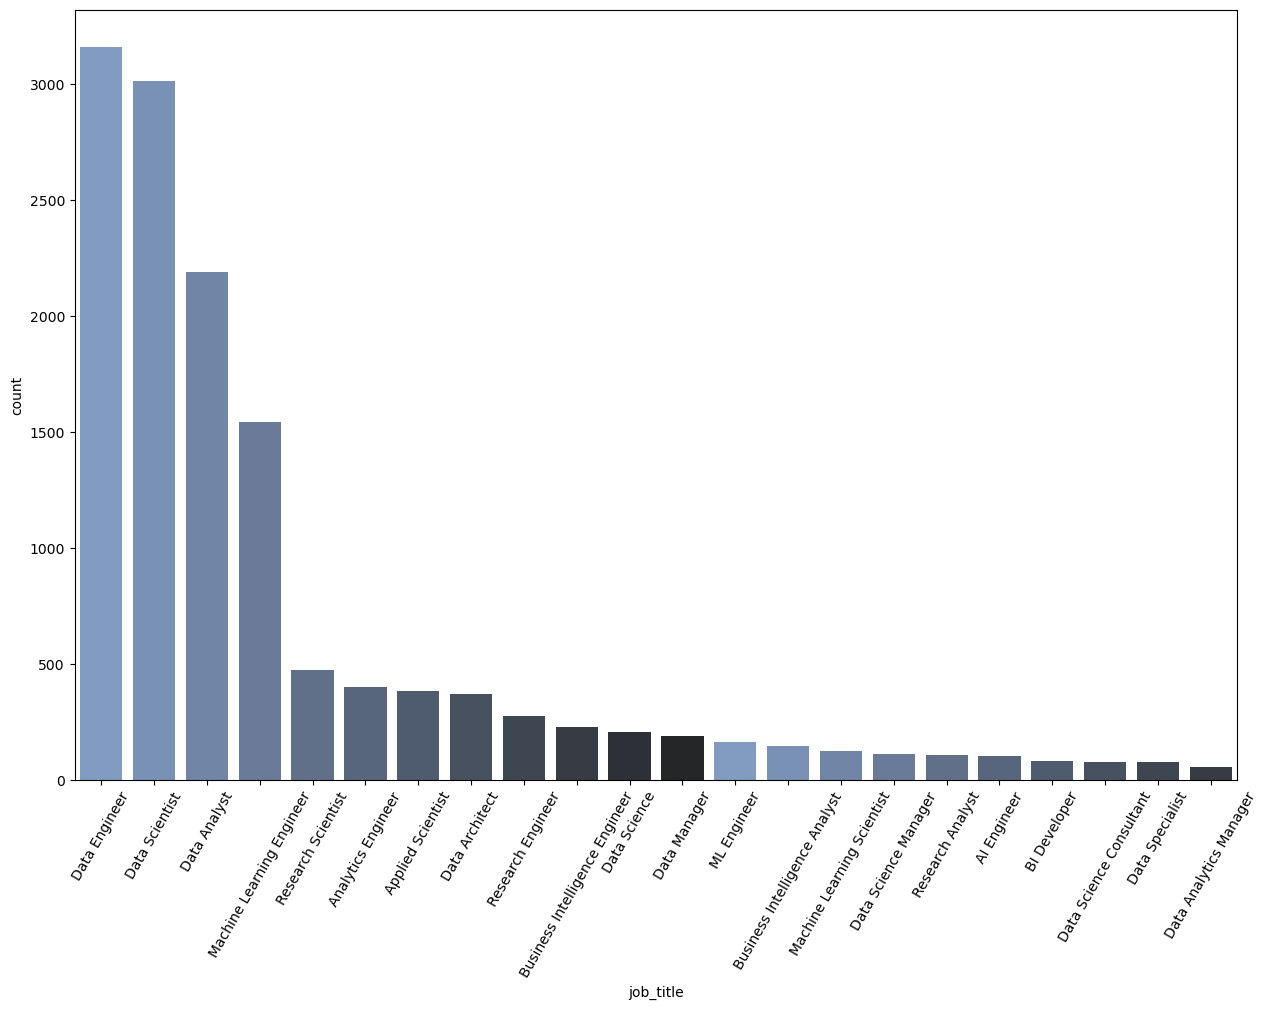

In [82]:
job_counts = data['job_title'].value_counts().reset_index()
job_counts.columns = ['job_title', 'count']

filtered_jobs = data[data['job_title'].isin(job_counts[job_counts['count'] > 50]['job_title'])]


plt.rc('xtick', labelsize=10)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
color = sns.dark_palette("#79C", n_colors=12, reverse=True)
sns.countplot(x="job_title", data=filtered_jobs, order=filtered_jobs['job_title'].value_counts().index, palette=color)

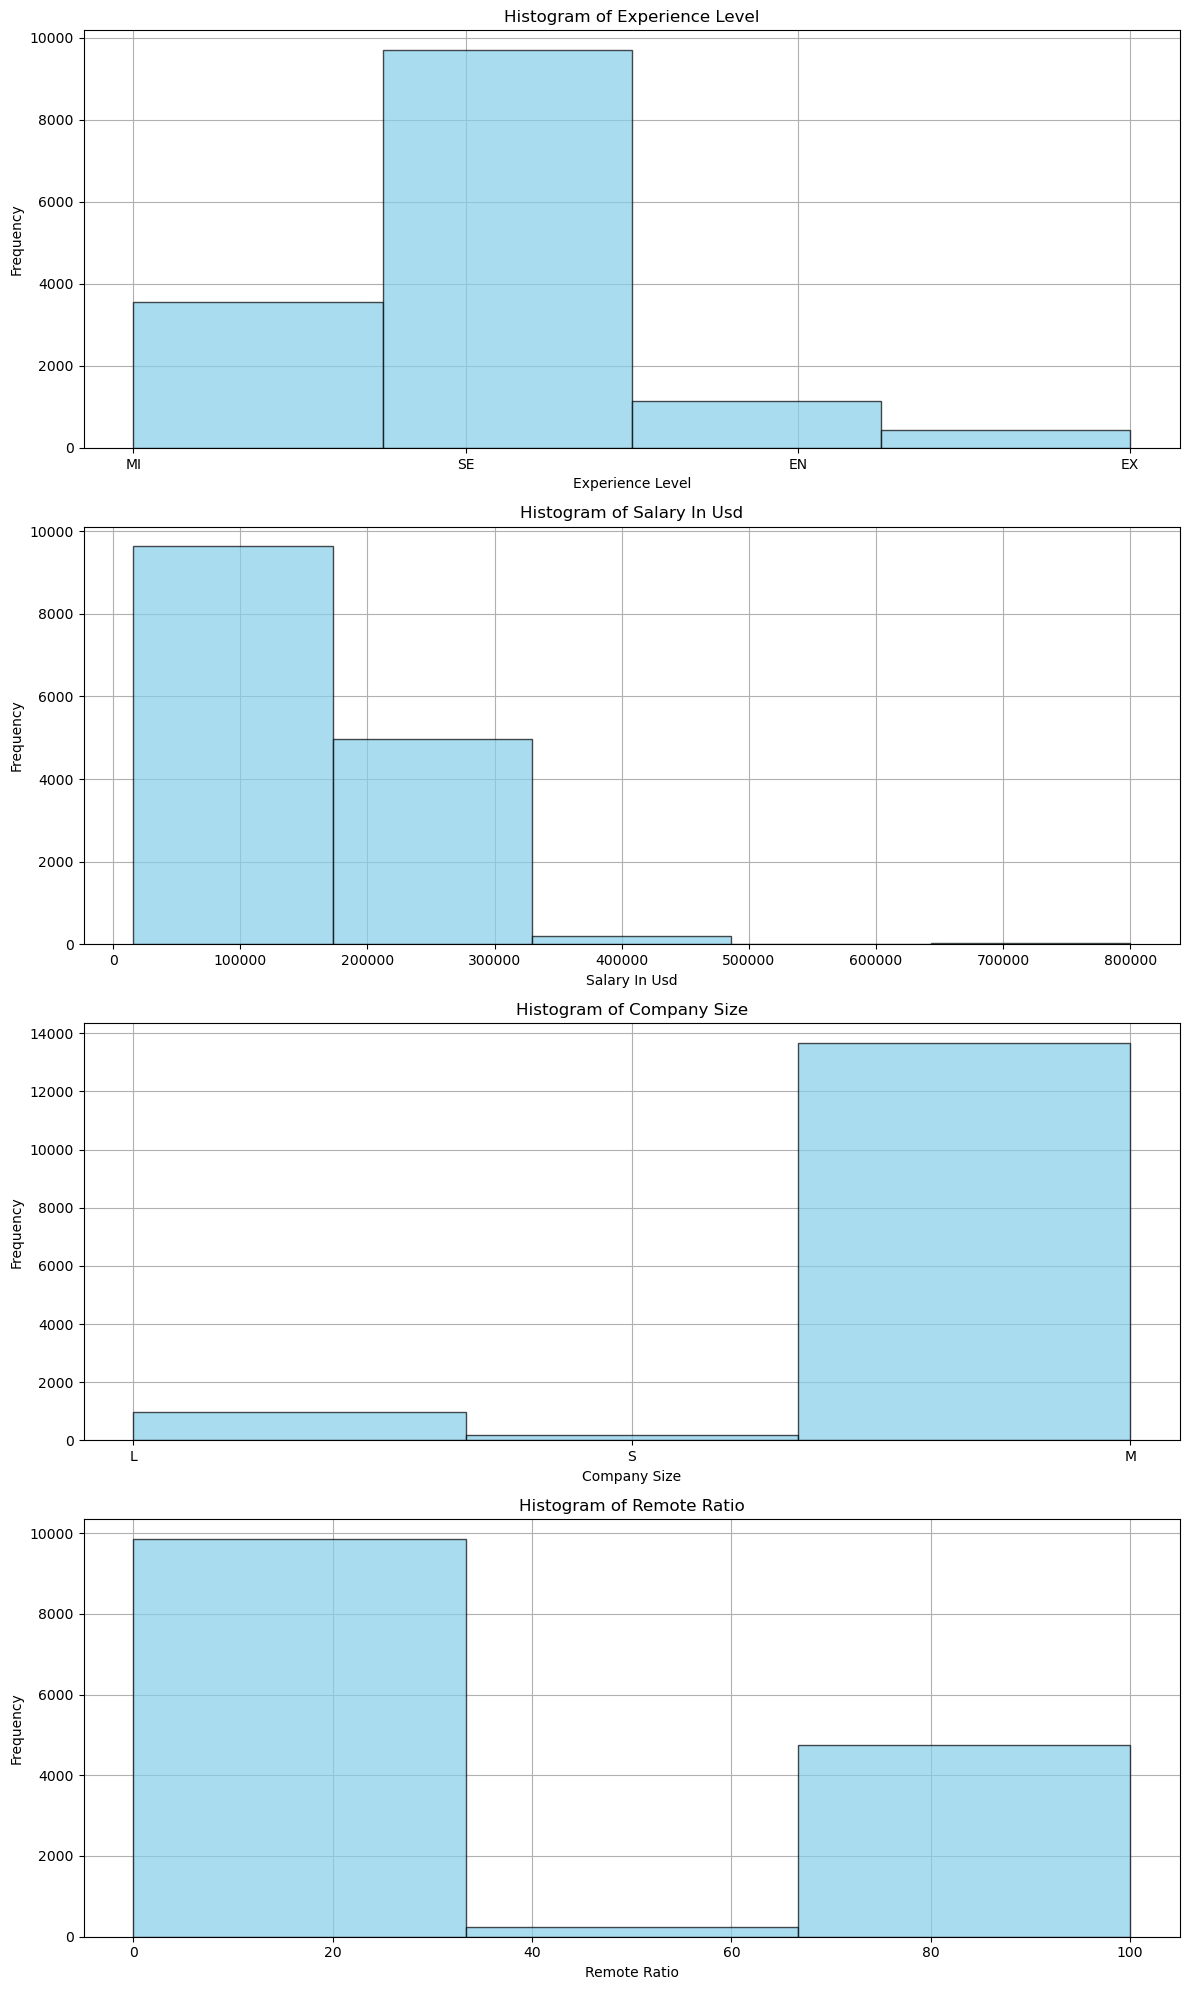

In [83]:
columns_to_plot = ['experience_level','salary_in_usd','company_size', 'remote_ratio']
bins = [4, 5, 3, 3]
num_plots = len(columns_to_plot)

fig, axs = plt.subplots(num_plots, 1, figsize=(12, num_plots * 5))

# Plot histograms using a for loop
for i, col in enumerate(columns_to_plot):
    axs[i].hist(data[col], bins=bins[i], color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_xlabel(col.replace('_', ' ').title())
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of {col.replace("_", " ").title()}')
    axs[i].grid(True)  # Add grid lines
    axs[i].set_axisbelow(True)  # Ensure grid lines are behind bars

plt.tight_layout()
plt.show()

Preprocessing

In [84]:
def process_job_title(job_titles):
  #define keywords
  job_cat_key = ['Data', 'Machine Learning', 'Business Intelligence', 'Artificial Intelligence', 'Research', 'Other']
  job_title_key = ['Engineer', 'Analyst', 'Developer', 'Scientist', 'Speicialist', 'Manager']

  job_cat_new = []
  job_title_new = []

  def check_job_cat_or_type(jobs, title):
    for job in jobs:
       if job in title:
          return job
    return None

  for i, title in enumerate(job_titles):
     #replace abbreviations
     title = title.replace('ML', 'Machine Learning').replace('BI', 'Business Intelligence').replace('AI', 'Artificial Intelligence')

  for i, title in enumerate(job_titles):
    check1 = check_job_cat_or_type(job_cat_key, title)
    check2 = check_job_cat_or_type(job_title_key, title)

    if check1 is not None:
        job_cat_new.append(check1)
    else:
        job_cat_new.append('Other')
    
    if check2 is not None:
        job_title_new.append(check2)
    else:
        job_title_new.append('Other')

  return job_cat_new, job_title_new


In [85]:
import pycountry
import pycountry_convert as pc

def process_location(job_data):
    job_data = job_data.value_counts().reset_index()
    job_data.columns = ['location', 'frequency']
    filter_threshold = 0.5

    def get_continent(country_code):
        country_name = pycountry.countries.get(alpha_2 = country_code)
        if country_name:
            return pc.country_alpha2_to_continent_code(country_code)
        else:
            return 'Other'
        
    for index,row in job_data.iterrows():
        if row['frequency'] / job_data.shape[0] < filter_threshold:
            job_data.at[index, 'location'] = get_continent(row['location'])

    return job_data['location']

In [86]:
data['employee_residence'] = process_location(data['employee_residence'])
data['company_location'] = process_location(data['company_location'])
data['job_category'], data['job_title'] = process_job_title(data['job_title'])
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2021,MI,FT,Scientist,30400000,CLP,44051.0,US,100,US,L,Data
1,2021,MI,FT,Analyst,11000000,HUF,39893.0,GB,50,GB,L,Data
2,2020,MI,FT,Scientist,11000000,HUF,39985.0,CA,50,CA,L,Data
3,2021,MI,FT,Engineer,8500000,JPY,85118.0,ES,50,ES,S,Other
4,2022,SE,FT,Engineer,7500000,INR,101300.0,DE,50,DE,L,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Developer,15000,USD,15930.0,NaN,100,NaN,M,Business Intelligence
14834,2020,EX,FT,Analyst,15000,USD,16784.0,NaN,0,NaN,M,Data
14835,2021,EN,FT,Developer,15000,USD,16503.0,NaN,100,NaN,L,Machine Learning
14836,2022,EN,FT,Analyst,15000,USD,15930.0,NaN,0,NaN,L,Data


In [87]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoding_cat = ['employee_residence','company_location','remote_ratio', 'job_category', 'job_title', 'employment_type','company_size']
ordinal_encoding_cat = ['experience_level']

ode1 = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX']])
ohe = OneHotEncoder(sparse_output = False)

##columnTransformer
ct = ColumnTransformer(
    transformers=[
        ('ode1', ode1, ['experience_level']),
        ('ohe', ohe, one_hot_encoding_cat),
    ],
    remainder='passthrough'
)

trf = ct.fit_transform(data)
df = pd.DataFrame(trf,columns=ct.get_feature_names_out())

data.drop(one_hot_encoding_cat + ordinal_encoding_cat, axis=1, inplace=True)

data = data.join(df)

data


,work_year,salary,salary_currency,salary_in_usd,ode1__experience_level,ohe__employee_residence_AF,ohe__employee_residence_AS,ohe__employee_residence_AU,ohe__employee_residence_CA,ohe__employee_residence_DE,...,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__work_year,remainder__salary,remainder__salary_currency,remainder__salary_in_usd
0,2021,30400000,CLP,44051.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,30400000,CLP,44051.0
1,2021,11000000,HUF,39893.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,11000000,HUF,39893.0
2,2020,11000000,HUF,39985.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2020,11000000,HUF,39985.0
3,2021,8500000,JPY,85118.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2021,8500000,JPY,85118.0
4,2022,7500000,INR,101300.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2022,7500000,INR,101300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,15000,USD,15930.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2022,15000,USD,15930.0
14834,2020,15000,USD,16784.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2020,15000,USD,16784.0
14835,2021,15000,USD,16503.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2021,15000,USD,16503.0
14836,2022,15000,USD,15930.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2022,15000,USD,15930.0


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_drop = ['work_year', 'salary', 'salary_currency', 'remainder__salary_currency', 'remainder__salary_in_usd','remainder__salary','remainder__work_year']
data.drop(data_drop, axis=1, inplace=True)

scaler = StandardScaler()
data['salary_in_usd'] = pd.DataFrame(scaler.fit_transform(data[['salary_in_usd']]))

# Split the data into training and testing sets
y = data['salary_in_usd']
X = data.drop('salary_in_usd', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score

def calculate_metrics(y_test, y_pred, threshold): 
    
    # Convert predictions to binary outcomes based on the threshold
    y_pred_binary = (y_pred >= threshold).astype(int)
    y_test_binary = (y_test >= threshold).astype(int)

    # Compute mes, precision, recall, and accuracy
    mse = mean_squared_error(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)

    print("Mean Squared Error: ", mse)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)



Linear regression

In [90]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
calculate_metrics(y_test, y_pred, 0.5)

Mean Squared Error:  4.859467942198947e+22
Precision: 0.5722120658135283
Recall: 0.38170731707317074
Accuracy: 0.7503369272237197


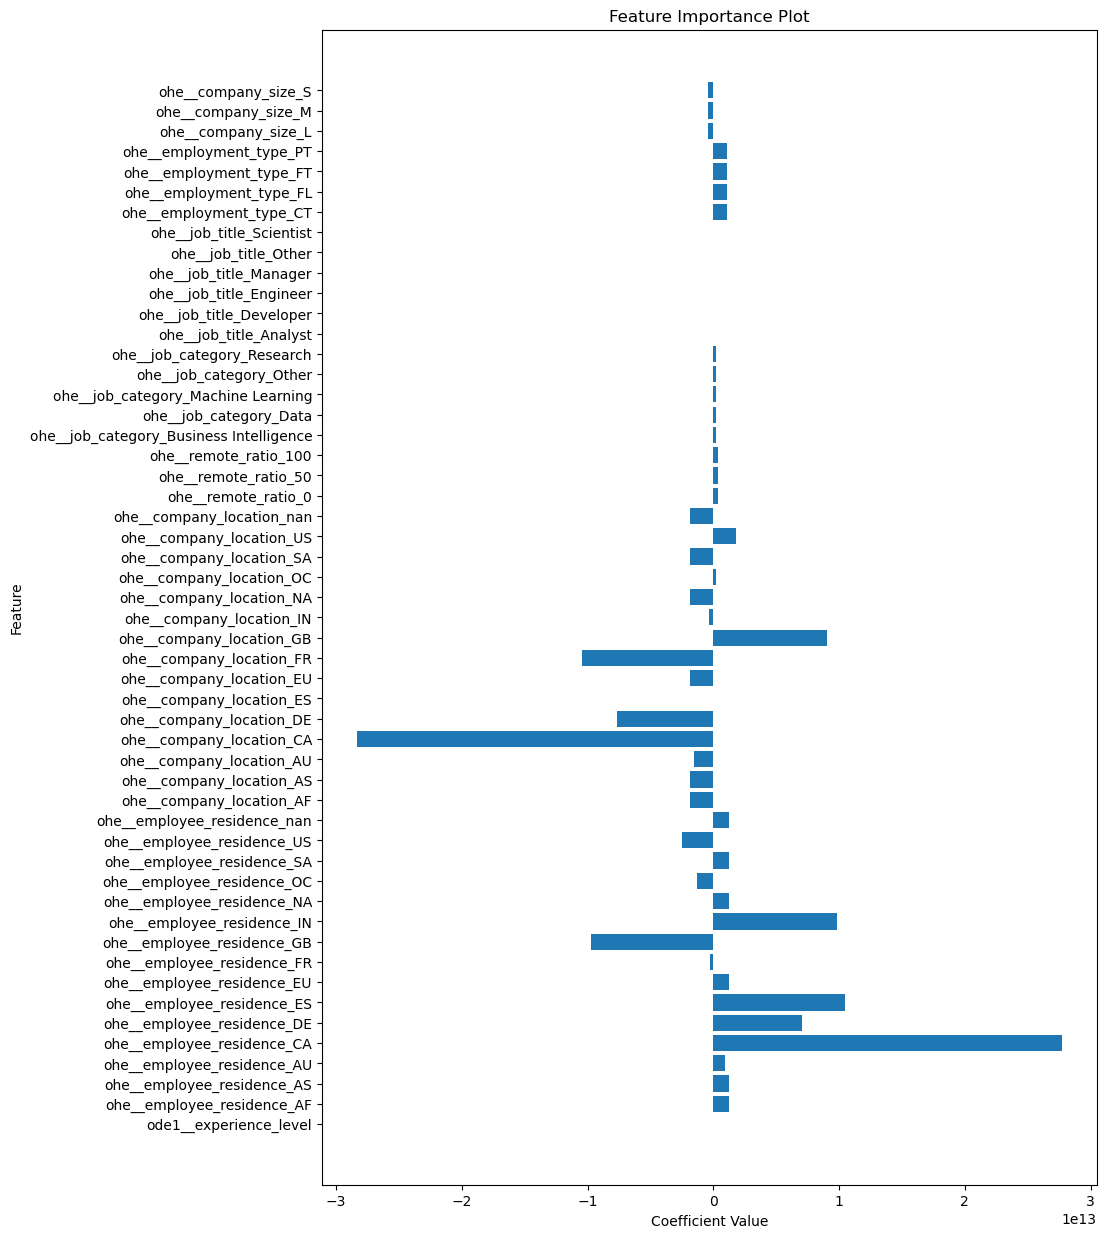

In [91]:
# Get feature coefficients
coefficients = model.coef_

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 15))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Polynomial Regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)

# Calculate the metrics
calculate_metrics(y_test, y_pred_poly, 0.5)

Mean Squared Error:  2.9812318942091056e+23
Precision: 0.5743801652892562
Recall: 0.33902439024390246
Accuracy: 0.7479784366576819


In [93]:
from sklearn.svm import SVR

model_svr = SVR(epsilon = 0.6)
model_svr.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_test)

# Calculate the metrics
calculate_metrics(y_test, y_pred_svr, 0.5)

Mean Squared Error:  0.351922366576395
Precision: 0.6
Recall: 0.2780487804878049
Accuracy: 0.7493261455525606


Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_rf = rf_regressor.predict(X_test)

# Calculate the metrics
calculate_metrics(y_test, y_pred_rf, 0.5)


Mean Squared Error:  0.33290959668434683
Precision: 0.5471698113207547
Recall: 0.45975609756097563
Accuracy: 0.7456199460916442


Gradient Boosting Regressor 

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the gradient boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)


# Make predictions with the trained model
y_pred_gb = gb_regressor.predict(X_test)

# Calculate the metrics
calculate_metrics(y_test, y_pred_gb, 0.5)

Mean Squared Error:  0.3664473322151808
Precision: 0.5681381957773513
Recall: 0.36097560975609755
Accuracy: 0.7476415094339622


Decision Tree Regressor 

In [96]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the decision tree regressor 
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions with the trained model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate the metrics
calculate_metrics(y_test, y_pred_dt, 0.5)

Mean Squared Error:  0.33849865718508215
Precision: 0.5416666666666666
Recall: 0.45975609756097563
Accuracy: 0.7432614555256065
